In [15]:
from torch.utils.data import DataLoader
import torch
from torchvision.transforms import functional
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
datadir = "/mikQNAP/NYU_knee_data/knee_train_h5/data/train"
batchsize = 1
device = torch.device(f'cuda:{3}')

data dir /mikQNAP/NYU_knee_data/knee_train_h5/data/train
Using data from: /mikQNAP/NYU_knee_data/knee_train_h5/data/train
Found 5120 image paths.


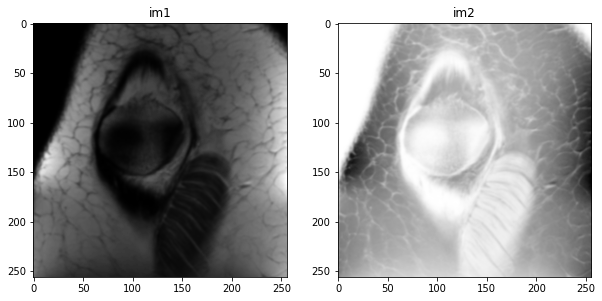

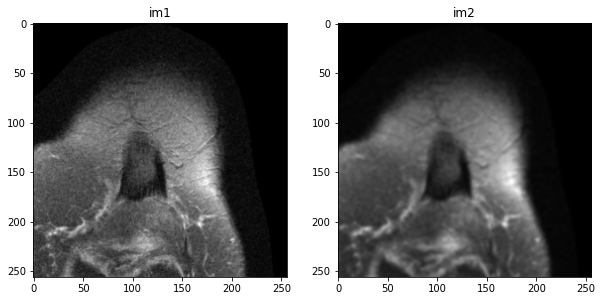

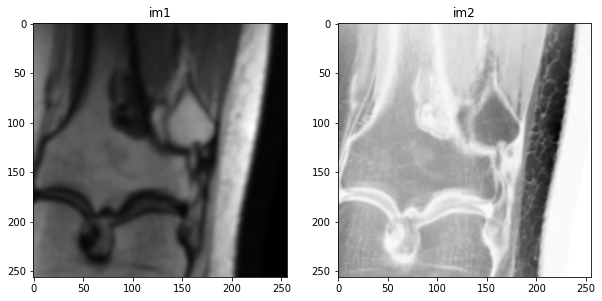

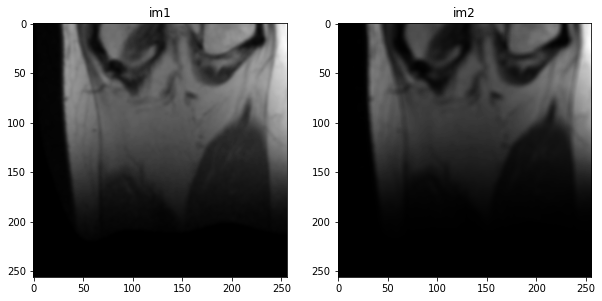

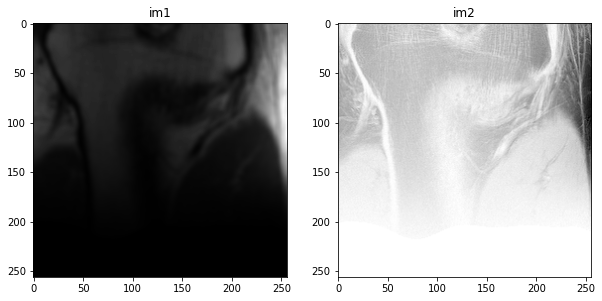

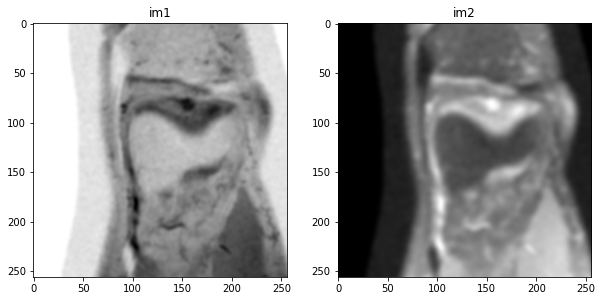

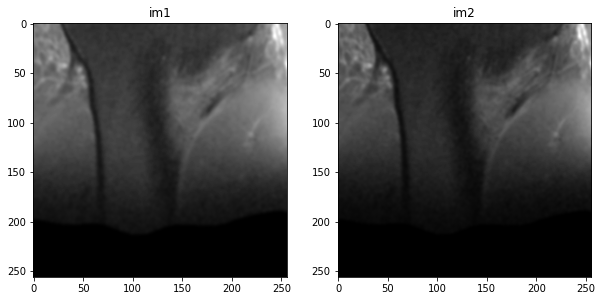

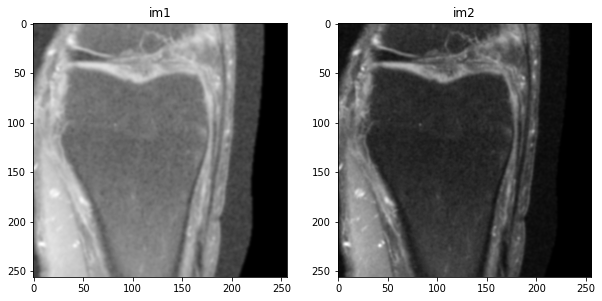

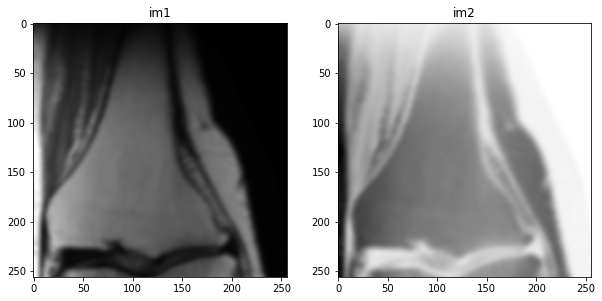

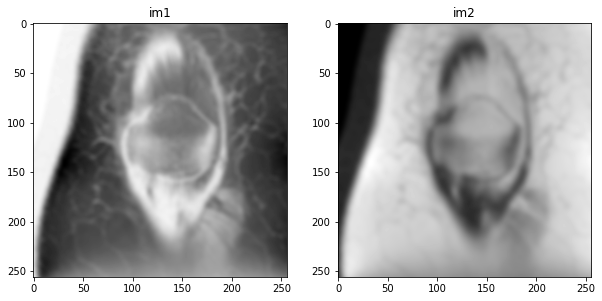

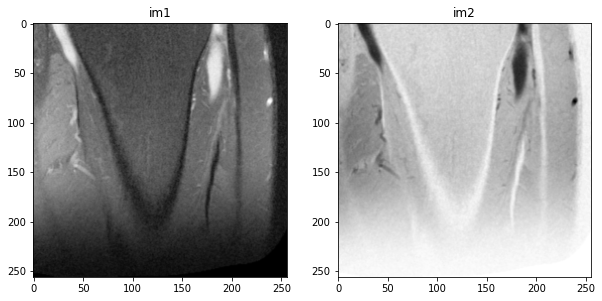

In [24]:
from importlib import reload
import momentum.dataset
reload(momentum.dataset)

magnitude = True

dataset = momentum.dataset.UFData(datadir, magnitude=magnitude, device=device,
                              fastmri=True, random_augmentation=True, normalization=0.99)
dataloader = DataLoader(dataset, batchsize, shuffle=True, drop_last=True,
                                     num_workers=batchsize, pin_memory=True)

for index, im in enumerate(dataloader):
    im1, im2 = im
    plt.figure(figsize = (10,10))
#     plt.subplot(1,2,1)
#     plt.imshow(og[0,0], cmap='gray')
#     plt.title("no augmentations")
#     plt.subplot(1,2,2)
#     plt.imshow(sens[0,0], cmap='gray')
#     plt.title("sensitive augmentations")
    plt.subplot(1,2,1)
    plt.imshow(im1[0,0], cmap='gray')
    plt.title("im1")
    plt.subplot(1,2,2)
    plt.imshow(im2[0,0], cmap='gray')
    plt.title("im2")
    
    if index == 10:
        break


In [ ]:
im.shape

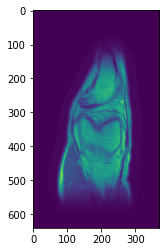

In [20]:
mag_im = torch.abs(im).float()[0]
plt.imshow(mag_im)

tensor(0.) tensor(1.)
torch.Size([640, 372])


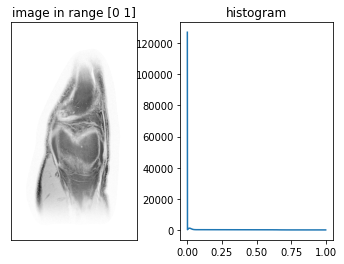

In [56]:
def minmax_norm(img):
    return (img-img.min()) / (img.max() - img.min())

minmax_im = minmax_norm(mag_im)

print(minmax_im.min(), minmax_im.max())

plt.subplot(1,2,1)
plt.imshow(1-minmax_im,cmap='gray')
plt.title('image in range [0 1]')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist, bins = np.histogram(minmax_im.ravel(), bins=1000)
# plt.xlim([0,1])
plt.plot(bins[:-1], hist)
plt.title('histogram')

print(minmax_im.shape)

tensor(0.) tensor(1.5250)


Text(0.5, 1.0, 'histogram')

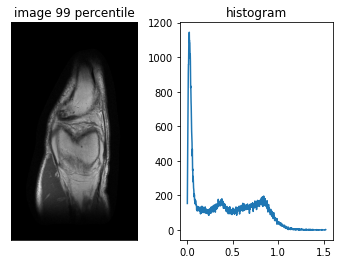

In [52]:
def normalize(img, low_percent = 0.01, high_percent=0.99):
    high_quantile = torch.quantile(img, high_percent)
    return img/(high_quantile + 1e-7)

percent_low = 1
percent_high = 99
image1 = normalize(minmax_im)
print(image1.min(), image1.max())

plt.subplot(1,2,1)
plt.imshow(image1,cmap='gray')
plt.title('image 99 percentile')
plt.xticks([])
plt.yticks([])

plt.subplot(1,2,2)
hist, bins = np.histogram(image1.ravel(), bins=1000)
# plt.xlim([0,1])
plt.plot(bins[1:-1], hist[1:])
plt.title('histogram')


#clip to 0-1 after